# Dataset and DataLoader
- Dataset: 데이터셋을 불러와 샘플과 정답(target or label)을 저장하는 모듈
- DataLoader: 데이터셋을 샘플에 쉽게 접근할 수 있도록 iterable object(순회 가능한 객체)로 감싸는 모듈
    - Key Method: `__init__()`, `__len__()`, `__getitem__()`

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## 1. Load Dataset

In [3]:
train_data = datasets.FashionMNIST(
    root = './data',
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = './data',
    train = False,
    download = True,
    transform = ToTensor()
)

## 2. Make Dataset iterable and Visualize it

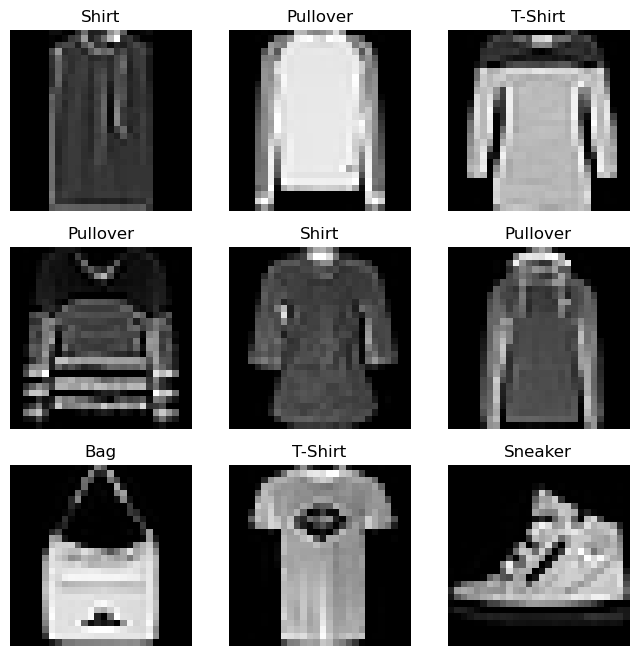

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize = (8, 8))

cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 3. Custom Dataset

In [7]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    # 이미지와 주석 파일(annotation_file)이 포함된 디렉토리와 두 가지 변형(transform)을 초기화
    def __init__(self, annotations_file, names=['file_name', 'label']):
        self.img_labels = pd.read_csv(annotations_file, names = ['file_name', 'label'])
        self.img_dir = img.dir
        self.transform = transform
        self.target_transform = transform

    # 데이터셋의 샘플 개수를 반환
    def __len__(self):
        return len(self.img_lables)
        
    # 주어진 인덱스 idx 에 해당하는 샘플을 데이터셋에서 불러오고 반환
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path) # read_image(): 이미지를 텐서로 변환
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

- `__init__()`
    - tshirt1.jpg, 0
    - tshirt2.jpg, 0
    - ......
    - ankleboot999.jpg, 9

## 4. DataLoader

In [9]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Iterate

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


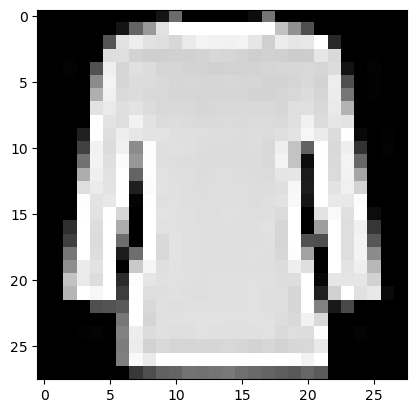

Label: 6


In [10]:
# 이미지와 정답(label)을 표시
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap="gray")
plt.show()

print(f"Label: {label}")